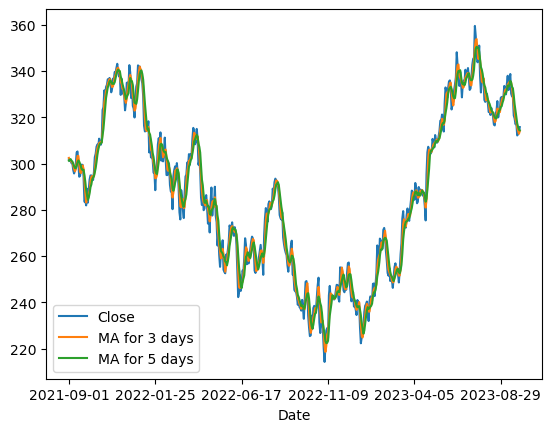

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

def str_to_date(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    
    return datetime.datetime(year, month, day)

data = pd.read_csv('MSFT.csv')
data = data[['Date', 'Close']]
data['Date'].apply(str_to_date)
data.index = data.pop('Date')


ma_day=[3,5,10,20,50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name]=data['Close'].rolling(ma).mean()
# data = window_data(data.loc['2021-05-26': , :])
data_2021=data.loc['2021-09-01': , :]

# data_2021[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
data_2021[['Close','MA for 3 days', 'MA for 5 days']].plot()

def data_to_date_X_y(df):
    dates = df.index
    
    arr = df.to_numpy()
    
    
    X = arr[:, 0:-1].reshape((len(dates), arr[:, 0:-1].shape[1], 1))
    y = arr[:, -1]
    
    return dates, X.astype(np.float32), y.astype(np.float32)

data_10 = data_2021.filter(['MA for 5 days']).values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_10)

# training data set 
p8 = int(np.ceil( len(data_10) * .60 ))
p9 = int(np.ceil( len(data_10) * .80 ))

train_data = scaled_data[0:p8, :]
val_data = scaled_data[p8:p9, :]
x_train = []
y_train = []
x_val = []
y_val = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
for i in range(60, len(val_data)):
    x_val.append(val_data[i-60:i, 0])
    y_val.append(val_data[i, 0])
        

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_val, y_val = np.array(x_val), np.array(y_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import regularizers

# L2 regularization parameter
l2_lambda = 0.001

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1), kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(Dense(25, kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_val, y_val),callbacks=[early_stop])

Epoch 1/200
4/4 [==============================] - 2s 148ms/step - loss: 0.2689 - val_loss: 0.1410
Epoch 2/200
4/4 [==============================] - 0s 46ms/step - loss: 0.1660 - val_loss: 0.1360
Epoch 3/200
4/4 [==============================] - 0s 45ms/step - loss: 0.1396 - val_loss: 0.1401
Epoch 4/200
4/4 [==============================] - 0s 46ms/step - loss: 0.1409 - val_loss: 0.1345
Epoch 5/200
4/4 [==============================] - 0s 45ms/step - loss: 0.1293 - val_loss: 0.1195
Epoch 6/200
4/4 [==============================] - 0s 46ms/step - loss: 0.1214 - val_loss: 0.1139
Epoch 7/200
4/4 [==============================] - 0s 45ms/step - loss: 0.1170 - val_loss: 0.1096
Epoch 8/200
4/4 [==============================] - 0s 45ms/step - loss: 0.1100 - val_loss: 0.1093
Epoch 9/200
4/4 [==============================] - 0s 46ms/step - loss: 0.1065 - val_loss: 0.1046
Epoch 10/200
4/4 [==============================] - 0s 45ms/step - loss: 0.1007 - val_loss: 0.0975
Epoch 11/200
4/4 [

Epoch 84/200
4/4 [==============================] - 0s 47ms/step - loss: 0.0232 - val_loss: 0.0229
Epoch 85/200
4/4 [==============================] - 0s 47ms/step - loss: 0.0230 - val_loss: 0.0230
Epoch 86/200
4/4 [==============================] - 0s 47ms/step - loss: 0.0226 - val_loss: 0.0224
Epoch 87/200
4/4 [==============================] - 0s 48ms/step - loss: 0.0222 - val_loss: 0.0225
Epoch 88/200
4/4 [==============================] - 0s 48ms/step - loss: 0.0219 - val_loss: 0.0218
Epoch 89/200
4/4 [==============================] - 0s 47ms/step - loss: 0.0216 - val_loss: 0.0222
Epoch 90/200
4/4 [==============================] - 0s 48ms/step - loss: 0.0214 - val_loss: 0.0210
Epoch 91/200
4/4 [==============================] - 0s 47ms/step - loss: 0.0211 - val_loss: 0.0215
Epoch 92/200
4/4 [==============================] - 0s 48ms/step - loss: 0.0208 - val_loss: 0.0207
Epoch 93/200
4/4 [==============================] - 0s 48ms/step - loss: 0.0205 - val_loss: 0.0208
Epoch 94/2

4/4 [==============================] - 0s 48ms/step - loss: 0.0086 - val_loss: 0.0091
Epoch 167/200
4/4 [==============================] - 0s 49ms/step - loss: 0.0083 - val_loss: 0.0085
Epoch 168/200
4/4 [==============================] - 0s 47ms/step - loss: 0.0083 - val_loss: 0.0105
Epoch 169/200
4/4 [==============================] - 0s 47ms/step - loss: 0.0084 - val_loss: 0.0079
Epoch 170/200
4/4 [==============================] - 0s 54ms/step - loss: 0.0087 - val_loss: 0.0092
Epoch 171/200
4/4 [==============================] - 0s 47ms/step - loss: 0.0081 - val_loss: 0.0094
Epoch 172/200
4/4 [==============================] - 0s 46ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 173/200
4/4 [==============================] - 0s 48ms/step - loss: 0.0078 - val_loss: 0.0094
Epoch 174/200
4/4 [==============================] - 0s 48ms/step - loss: 0.0078 - val_loss: 0.0082


In [21]:
test_data = scaled_data[p9 - 60: , :]

x_test = []
y_test = data_10[p9:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# root mean squared error
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
acc =1.96 * rmse #95% confident that the error lies within the range
print(rmse)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2:.4f}")

4/4 [==============================] - 0s 8ms/step
5.098477136085201
R-squared: 0.7806


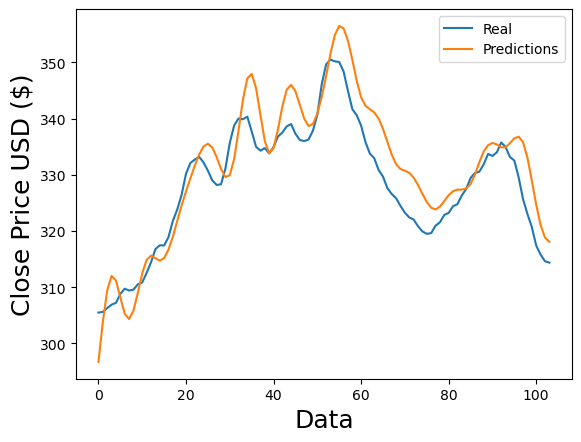

In [20]:
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(y_test)
plt.plot(predictions)
plt.legend(['Real','Predictions'])
plt.show()